In [50]:
import numpy as np
import  pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [52]:
df_test.shape,df_train.shape

((1000, 21), (2000, 21))

In [53]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [54]:
df_train.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [55]:
df_test.isna().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [56]:
df_train.columns,df_test.columns

(Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
        'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
        'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
        'touch_screen', 'wifi', 'price_range'],
       dtype='object'),
 Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
        'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
        'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
        'touch_screen', 'wifi'],
       dtype='object'))

## i will plot the  **count** **plot**  for  price range for each categorical column  to see how they affecting the price range

<Axes: xlabel='price_range', ylabel='count'>

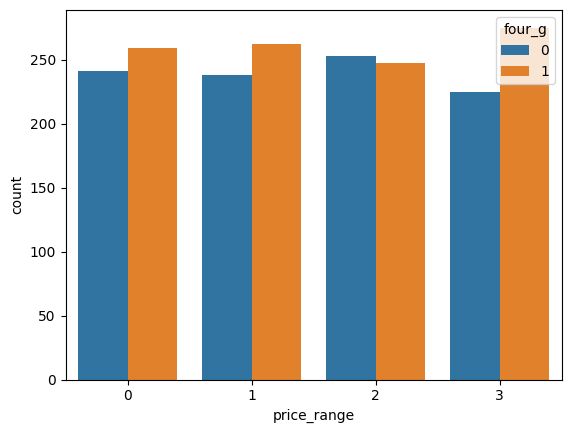

In [57]:
sns.countplot(x='price_range',data = df_train,hue='four_g')

<Axes: xlabel='price_range', ylabel='count'>

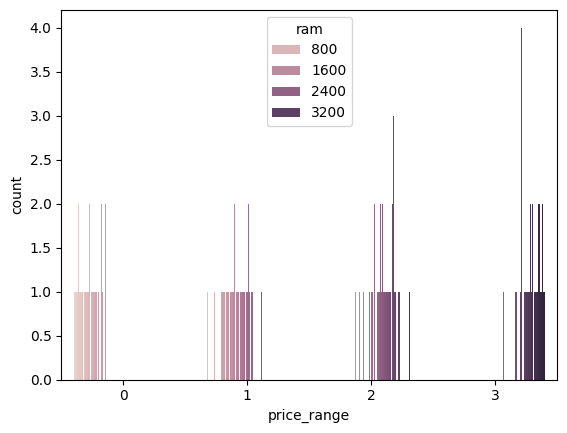

In [58]:
sns.countplot(x='price_range',data = df_train,hue='ram')

<Axes: xlabel='price_range', ylabel='count'>

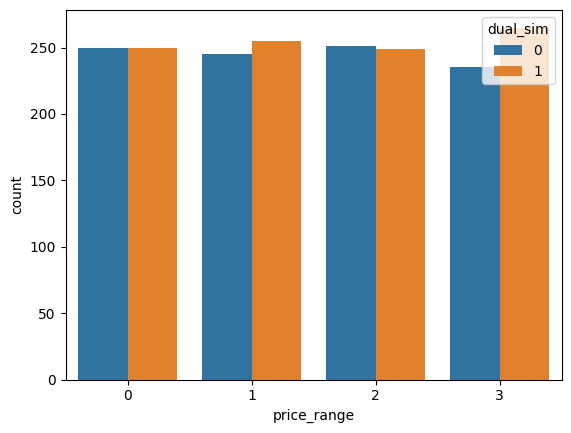

In [59]:
sns.countplot(x='price_range',data = df_train,hue='dual_sim')

<Axes: xlabel='price_range', ylabel='count'>

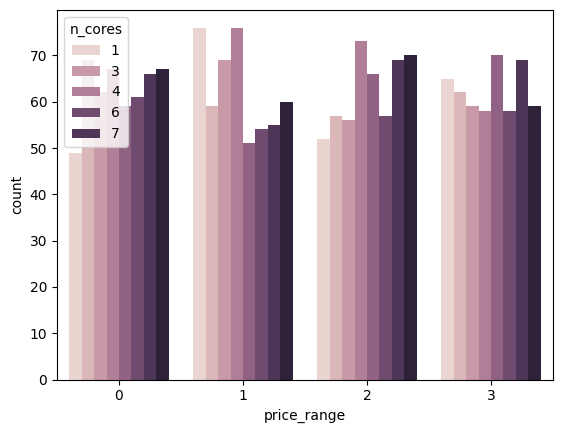

In [60]:
sns.countplot(x='price_range',data = df_train,hue='n_cores')

<Axes: xlabel='price_range', ylabel='count'>

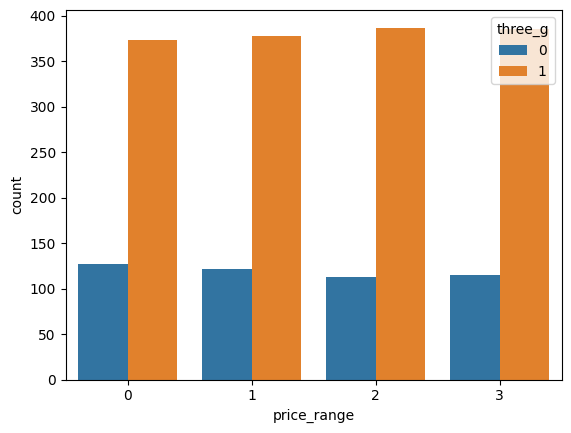

In [61]:
sns.countplot(x='price_range',data = df_train,hue='three_g')


<Axes: xlabel='price_range', ylabel='count'>

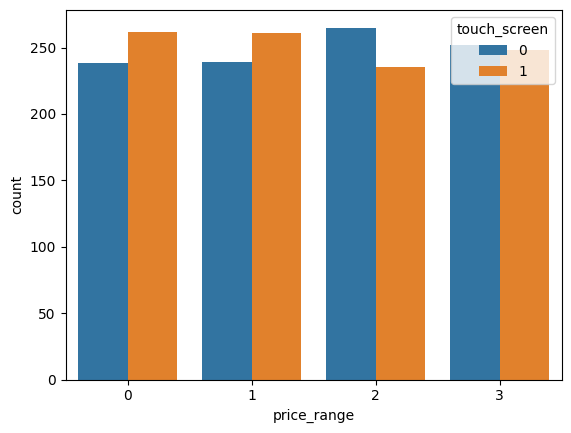

In [62]:
sns.countplot(x='price_range',data = df_train,hue='touch_screen')


<Axes: xlabel='price_range', ylabel='count'>

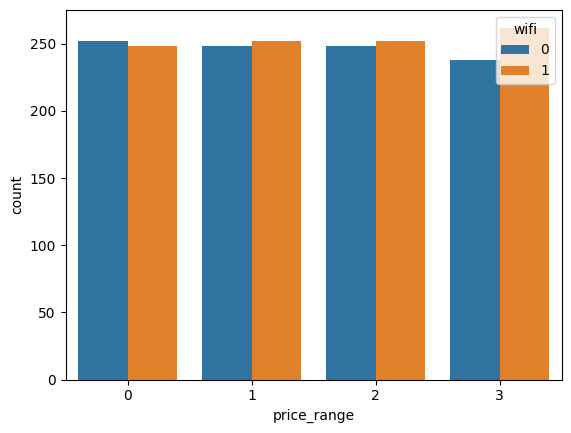

In [63]:
sns.countplot(x='price_range',data = df_train,hue='wifi')

# After Plotting So Many Count Plot I Can Say That **as Ram Increasing Price Range Is Increasing**





In [64]:
# data set looks clean , i can use feature engineering also
df_train['pixel_resolution_area'] = df_train['px_height']*df_train['px_width']
df_train.drop(['px_height','px_width','three_g'],inplace = True,axis = 1)# if not 4g  then 3g :) (2g phones are not coming these days)
df_test['pixel_resolution_area'] = df_test['px_height']*df_test['px_width']
df_test.drop(['px_height','px_width','three_g'],inplace = True,axis = 1)# if not 4g  then 3g :) (2g phones are not coming these days)


In [65]:
df_train.shape,df_test.shape

((2000, 19), (1000, 19))

In [66]:
# talk time and battery life is almost same so droping talk time.
df_train.drop( ['talk_time'] , inplace = True , axis = 1 )
df_test.drop( ['talk_time'] , inplace = True , axis = 1 )

In [67]:
# color can increase or decrease the value by 500-1000 rupee but cannot change the price range drastically
df_train.drop(['blue'],inplace = True , axis =1)

In [68]:
df_test.drop(['blue'],inplace = True , axis =1)

In [69]:
df_train.columns , df_test.columns

(Index(['battery_power', 'clock_speed', 'dual_sim', 'fc', 'four_g',
        'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'ram', 'sc_h',
        'sc_w', 'touch_screen', 'wifi', 'price_range', 'pixel_resolution_area'],
       dtype='object'),
 Index(['id', 'battery_power', 'clock_speed', 'dual_sim', 'fc', 'four_g',
        'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'ram', 'sc_h',
        'sc_w', 'touch_screen', 'wifi', 'pixel_resolution_area'],
       dtype='object'))

In [70]:
# droping id from test data_Set
df_test.drop(['id'],inplace = True , axis = 1)

In [71]:
# splitting the train_df into target and independent variables
target = df_train['price_range']
x_train = df_train.drop(['price_range'],axis = 1 ,inplace = True)

<Figure size 1500x1500 with 0 Axes>

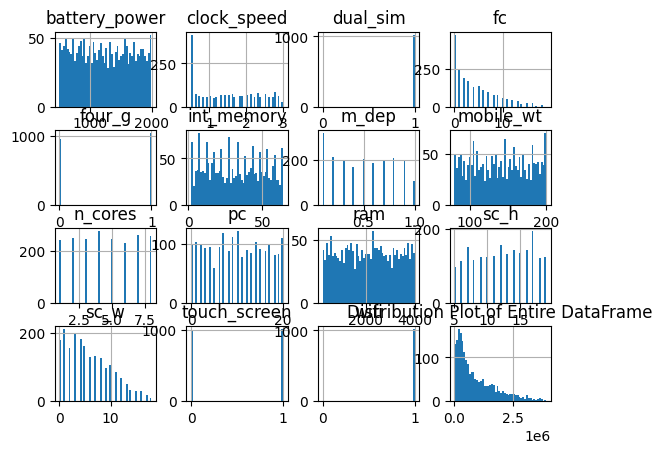

In [72]:
# checking the distribution of data
plt.figure(figsize = (15,15))
df_train.hist( bins = 50);
plt.title('Distribution Plot of Entire DataFrame')
plt.grid(True)
plt.show()

<Figure size 1000x1000 with 0 Axes>

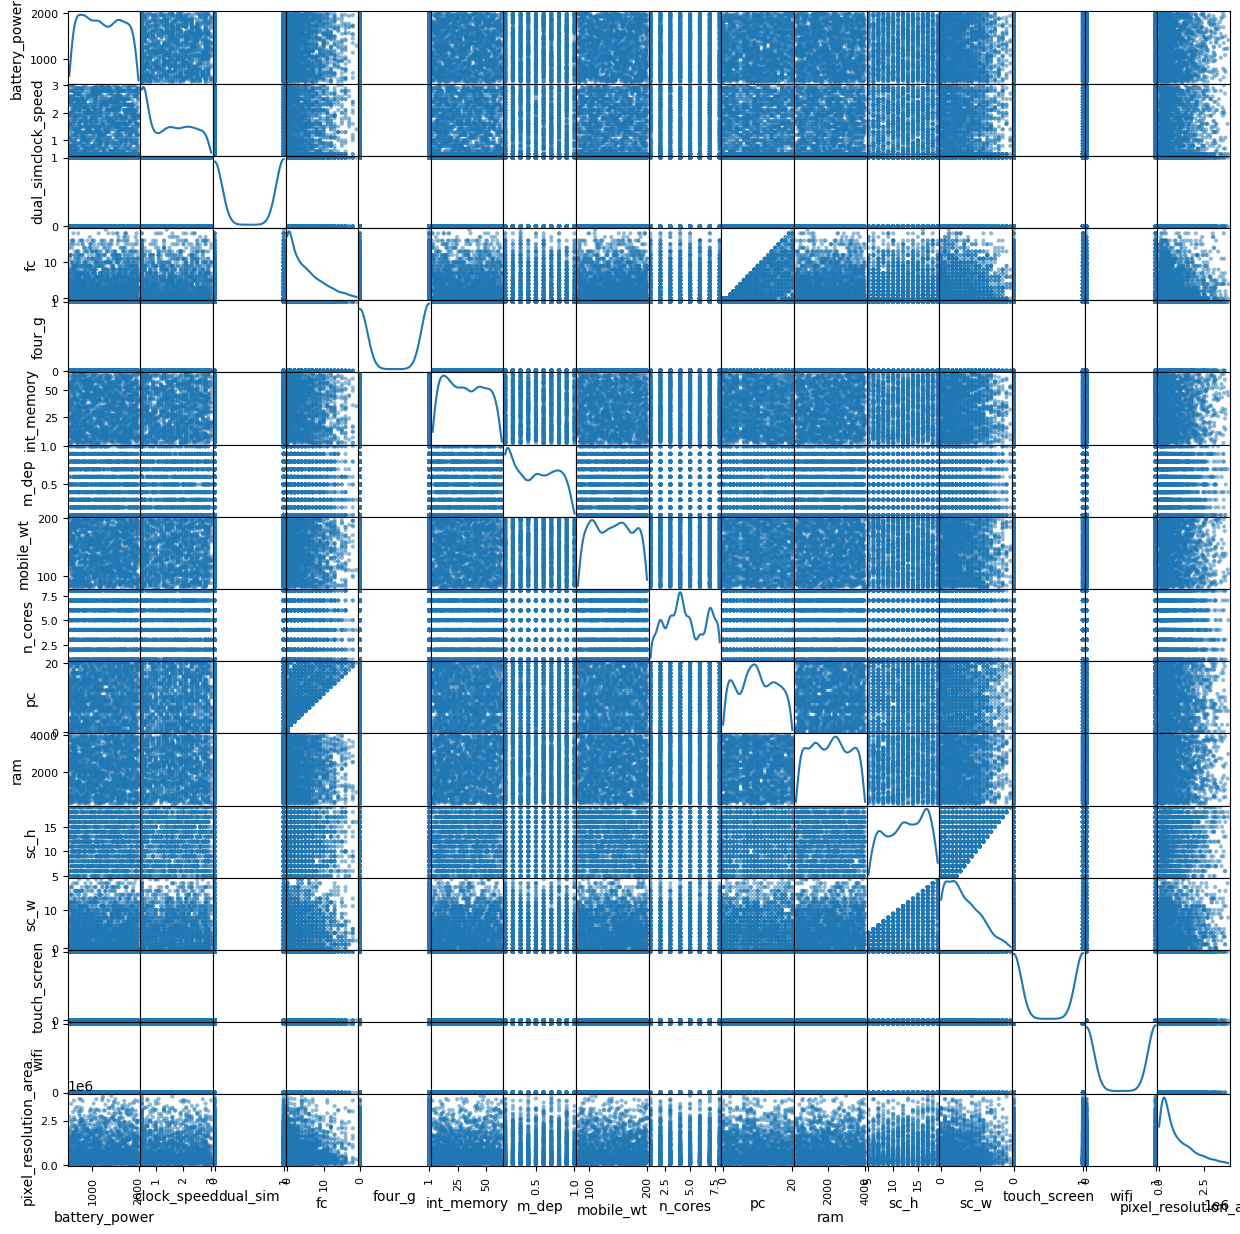

In [73]:
# plotting scatter matrix
from pandas.plotting import scatter_matrix
plt.figure(figsize=(10,10))
scatter_matrix(df_train ,figsize=(15,15),hist_kwds={'bins': 20},alpha =0.5,diagonal='kde');

<Axes: >

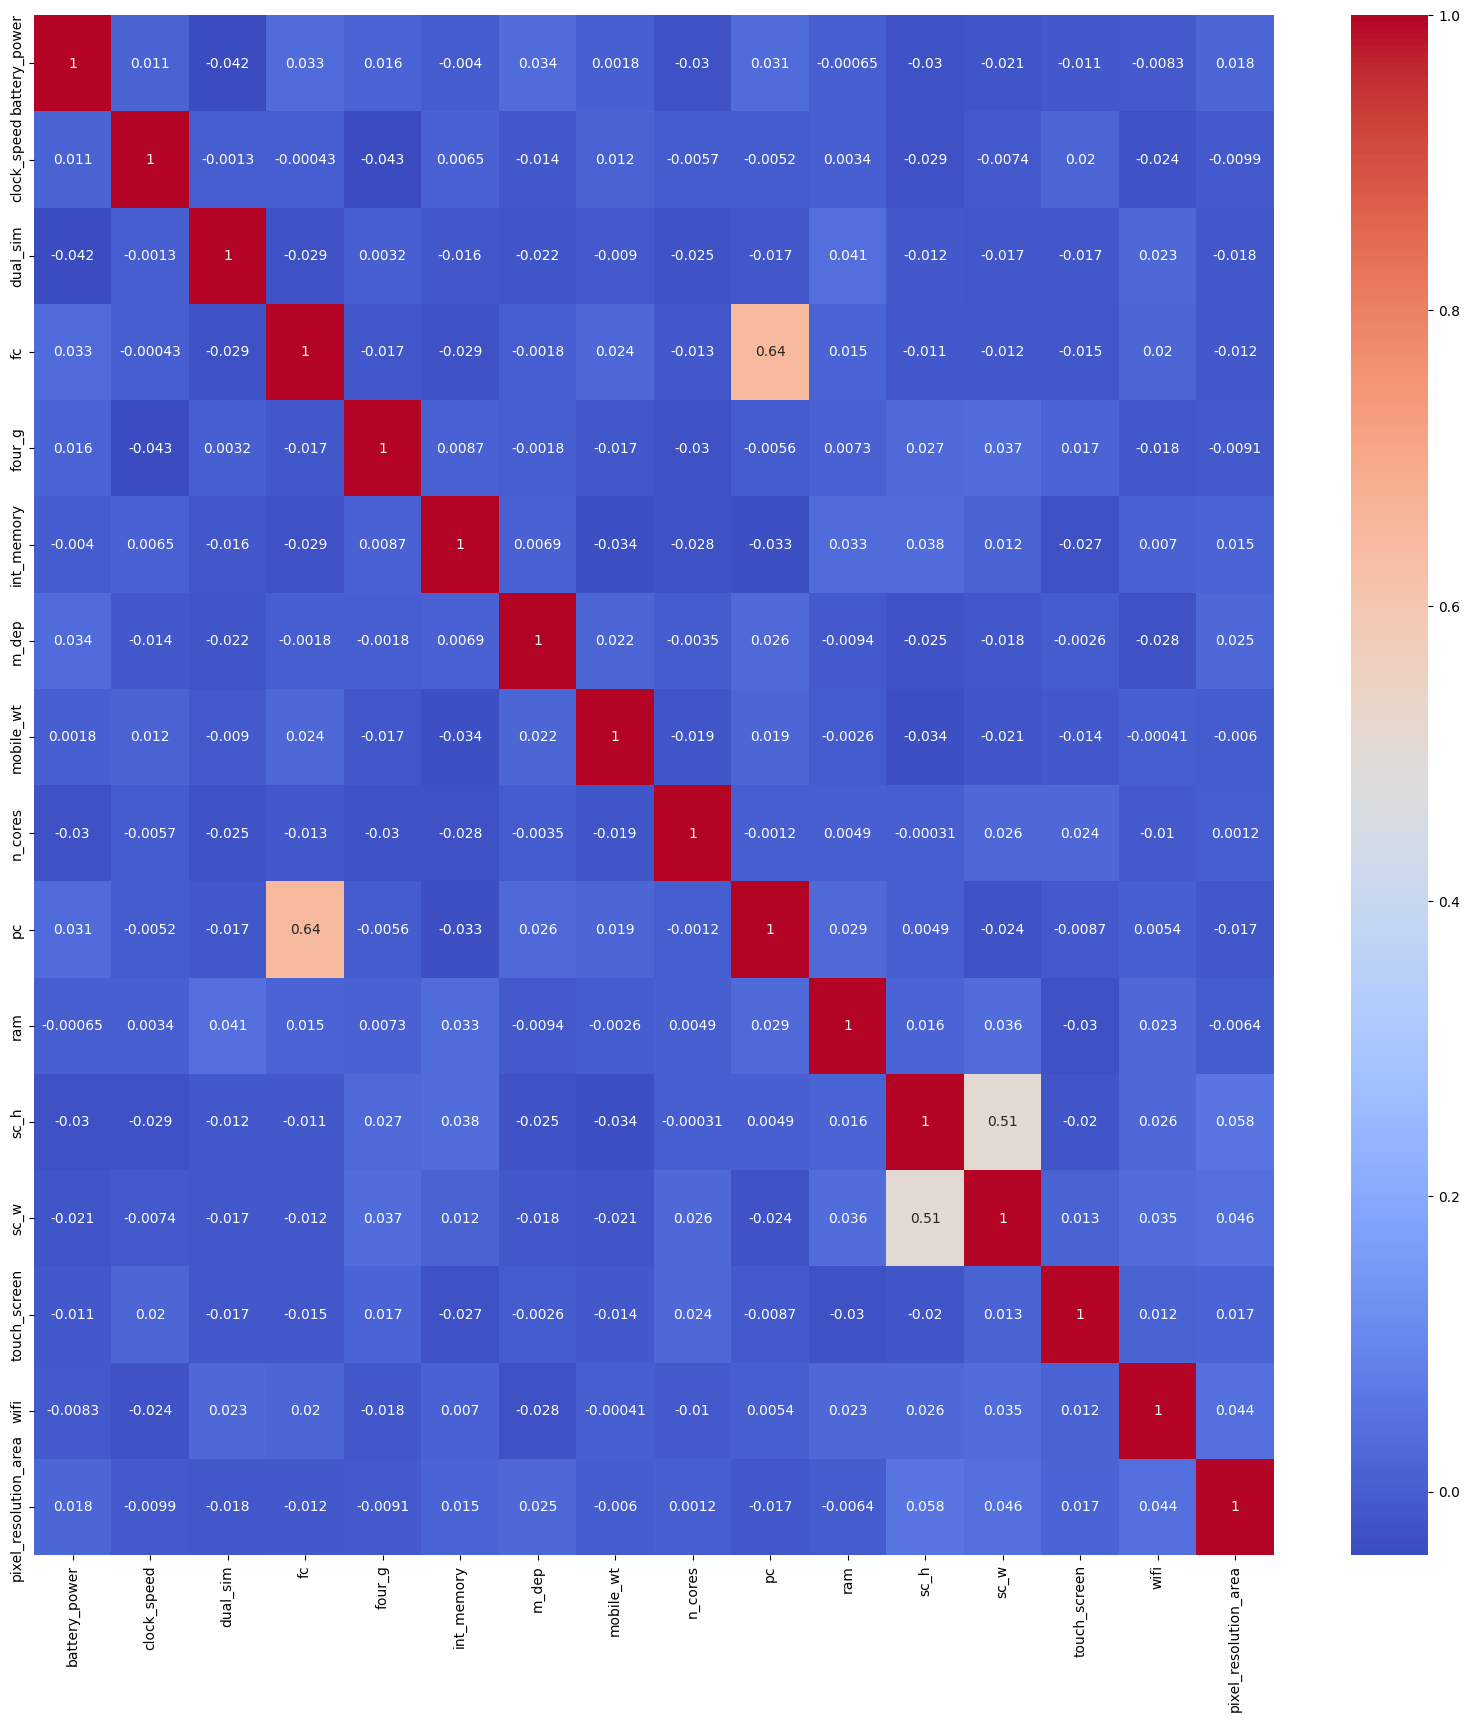

In [74]:
plt.figure(figsize = (20,20))
corr_matrix = df_train.corr()
sns.heatmap(corr_matrix ,annot = True, cmap ='coolwarm')

In [75]:
 # I want to use Scaling only on the continuous Data columns
continuous_data_columns = ['battery_power', 'clock_speed', 'fc',
        'int_memory', 'm_dep', 'mobile_wt', 'pc' , 'sc_h',
        'sc_w',  'pixel_resolution_area']
df_train.columns


Index(['battery_power', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'ram', 'sc_h',
       'sc_w', 'touch_screen', 'wifi', 'pixel_resolution_area'],
      dtype='object')

# By heatmap its clear that RAM size has huge impact on price Range.

In [206]:
# scaling the Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
XTrainScaled = scaler.fit_transform(df_train[continuous_data_columns])
XTestScaled = scaler.fit_transform(df_test[continuous_data_columns])
x_train_scaled = pd.DataFrame(XTrainScaled, columns = continuous_data_columns)
x_test_scaled = pd.DataFrame(XTestScaled, columns = continuous_data_columns)
x_train_scaled.reset_index(drop = True , inplace = True)
df_train_scaled = pd.concat([x_train_scaled,df_train['four_g'], df_train['dual_sim'],df_train['n_cores'], df_train['ram'], df_train['touch_screen'], df_train['wifi']],axis=1)
df_test_scaled = pd.concat([x_test_scaled,df_test['four_g'], df_test['dual_sim'],df_test['n_cores'], df_test['ram'], df_test['touch_screen'], df_test['wifi']],axis=1)



In [207]:
df_test_scaled

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,sc_h,sc_w,pixel_resolution_area,four_g,dual_sim,n_cores,ram,touch_screen,wifi
0,0.362241,0.52,0.736842,0.048387,0.000000,0.941667,0.80,0.500000,0.388889,0.085734,0,1,3,3476,1,0
1,0.227485,0.00,0.210526,0.951613,0.777778,0.925000,0.60,0.071429,0.000000,0.171764,1,1,5,3895,0,0
2,0.871915,0.92,0.052632,0.403226,0.888889,0.883333,0.20,0.857143,0.555556,0.466086,0,0,3,2396,1,1
3,0.697799,0.00,0.947368,0.370968,0.444444,0.133333,1.00,0.357143,0.000000,0.138857,1,1,8,3893,1,0
4,0.623082,0.36,0.578947,0.758065,0.444444,0.233333,0.90,0.714286,0.444444,0.162997,1,0,6,1773,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.800534,0.56,0.000000,0.838710,0.444444,0.750000,0.85,0.642857,0.444444,0.157968,1,0,7,2121,1,0
996,0.072715,0.52,0.000000,0.177419,0.888889,0.883333,0.10,0.214286,0.055556,0.505108,0,1,4,1933,1,1
997,0.456971,0.36,0.052632,0.096774,0.444444,0.000000,0.60,0.000000,0.000000,0.105727,1,0,1,1223,0,0
998,0.689126,0.00,0.000000,0.774194,0.333333,0.758333,0.60,0.714286,0.611111,0.008494,0,1,2,2509,1,0


# NOW i will check different **Models**

In [246]:
# converting the train and test data into array for easily apply operations
X = np.array(df_train_scaled)
Y = np.array(target)
X_test = np.array(df_test_scaled)

from sklearn.model_selection import train_test_split
x_train,x_dev,y_train,y_dev = train_test_split(X,Y,test_size =0.3)

In [247]:
from xgboost import XGBClassifier

In [248]:
xgb_cla = XGBClassifier()
xgb_cla.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [249]:
dev_pred = xgb_cla.predict(x_dev)


In [250]:
from sklearn.metrics import classification_report
cla_rep = classification_report(y_dev,dev_pred)

In [251]:
print(cla_rep)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       156
           1       0.87      0.87      0.87       140
           2       0.85      0.85      0.85       150
           3       0.92      0.91      0.91       154

    accuracy                           0.89       600
   macro avg       0.89      0.89      0.89       600
weighted avg       0.89      0.89      0.89       600



Text(0, 0.5, 'class_prediction_frequency')

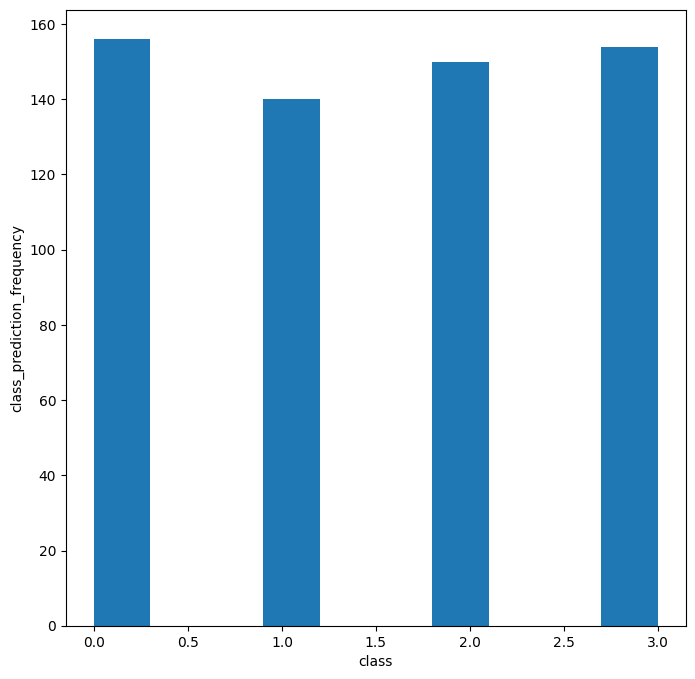

In [252]:
fig,ax = plt.subplots(1,1,figsize =(8,8))
ax.hist(y_dev);
ax.set_xlabel('class')
ax.set_ylabel('class_prediction_frequency')

In [256]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=50000)
log_reg.fit(x_train,y_train)
dev_pred_lr = log_reg.predict(x_dev)


In [257]:
class_rep_lr = classification_report(y_dev,dev_pred_lr)

In [258]:
print(class_rep_lr)

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       156
           1       0.88      0.84      0.86       140
           2       0.85      0.85      0.85       150
           3       0.92      0.93      0.92       154

    accuracy                           0.90       600
   macro avg       0.89      0.89      0.89       600
weighted avg       0.89      0.90      0.89       600



In [259]:
'''from sklearn.metrics import mean_squared_error
training_error =[]
dev_error = []
def plot_learning_curve_lr(x_train,x_dev,y_train,y_dev,Model):
    for i in range (len(x_train)):
        
        Model.fit(x_train[:i+1],y_train[:i+1])
        train_pred = Model.predict(x_train[:i+1])
        dev_pred = Model.predict(x_dev)
        training_error.append((mean_squared_error(y_train[:i] , y_train_predict )))
        dev_error.append((mean_squared_error(y_dev,pred_dev)))
        plt.plot(np.sqrt(training_error,'r-+',linewidth = 2 ,label ='train_rmse'))
        plt.plot(np.sqrt(dev_error,'b-',linewidth =2 ,label ='dev_rmse'))
        plt.legend()
        '''


    

In [ ]:
test_prediction = log_reg.predict(x_)